In [1]:
# Importação das bibliotecas para analise e manipluação de dados

import pandas as pd                                                # Analise e tratamento de dados
import numpy as np                                                 # Tratamento de dados numéricos
import matplotlib.pyplot as plt                                    # Plotagem de gráficos
import seaborn as sns                                              # Plotagem de gráficos
from sklearn.model_selection import train_test_split               # Divisão de conjuntos de dados de treino e teste
from sklearn.preprocessing import LabelEncoder                     # tratamento variaveis categoricas         
from sklearn.preprocessing import OneHotEncoder                    # tratamento de variaveis 
from sklearn.compose import ColumnTransformer                      # tratamento de variaveis
from sklearn.ensemble import RandomForestClassifier                # Algoritmo Random Forest(Árvore de decisão)
from sklearn.metrics import confusion_matrix, accuracy_score       # Matriz de confusão e métricas de precisão e acurácia
from sklearn.metrics import classification_report                  # metricas de avaliação do modelo 
from imblearn.under_sampling import TomekLinks                     # Subamostragem aleatória (undersampling)
from imblearn.over_sampling import SMOTE                           # Sobreamostragem aleatória (OverSampling)

# ignorando warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# carregando a base de dados

base_census =pd.read_csv('./data/census.csv')

In [3]:
# primeiros registros

base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


 <=50K    24720
 >50K      7841
Name: income, dtype: int64
 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64


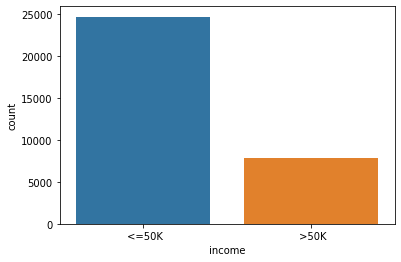

In [4]:
# quantidade registros por classe
# quantidade, percentual e visual 

print(base_census['income'].value_counts())
print(base_census['income'].value_counts(1))
sns.countplot(base_census['income']);

In [5]:
# informações da base de dados

base_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# definindo variaveis

# previsores
X_census = base_census.iloc[ :, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [7]:
# classes

y_census = base_census.iloc[ :, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [8]:
# label encoder categoricos

In [9]:
# tratamento nas variaveis categoricas com o LabelEncoder

label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

X_census[ :, 1] = label_encoder_workclass.fit_transform(X_census[ :, 1])
X_census[ :, 3] = label_encoder_education.fit_transform(X_census[ :, 3])
X_census[ :, 5] = label_encoder_marital.fit_transform(X_census[ :, 5])
X_census[ :, 6] = label_encoder_occupation.fit_transform(X_census[ :, 6])
X_census[ :, 7] = label_encoder_relationship.fit_transform(X_census[ :, 7])
X_census[ :, 8] = label_encoder_race.fit_transform(X_census[ :, 8])
X_census[ :, 9] = label_encoder_sex.fit_transform(X_census[ :, 9])
X_census[ :, 13] = label_encoder_country.fit_transform(X_census[ :, 13])

In [10]:
# visualização após tratamento

X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [11]:
# implementação Tomek Links

In [12]:
# uso do tomek links(majority, all) que retira os registros para equilibrar as classes

# tl = TomekLinks(sampling_strategy='majority') # 85.52% apenas da maior classe
tl = TomekLinks(sampling_strategy='all')        # 88.74% das duas classes
X_under, y_under = tl.fit_resample(X_census, y_census)

In [13]:
# visualização após tratamento

X_under.shape, y_under.shape
# algoritmo reduziu 2_000('majority') registros da base original para equilibrar a base

((27763, 14), (27763,))

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))


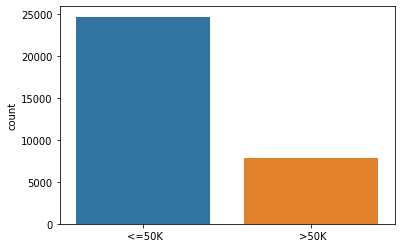

In [14]:
# quantidade registros por classe
# quantidade, visual 

print(np.unique(y_census, return_counts=True))
sns.countplot(y_census);

(array([' <=50K', ' >50K'], dtype=object), array([22321,  5442], dtype=int64))


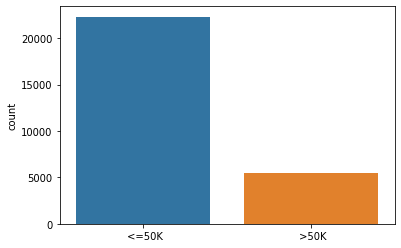

In [15]:
# quantidade registros por classe
# quantidade, visual 

print(np.unique(y_under, return_counts=True))
sns.countplot(y_under);

In [16]:
# tratamento Onehotencoder

one_hot_encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
X_under = one_hot_encoder.fit_transform(X_under).toarray()
X_under

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [17]:
# após os tratamentos

X_under.shape,

((27763, 108),)

In [18]:
# separação treino e teste Hold-out validation

X_census_treinamento_under, X_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)
X_census_treinamento_under.shape, X_census_teste_under.shape

((22210, 108), (5553, 108))

In [19]:
# uso de algoritmo de classificação
# randomForest

# definindo paramtros
random_forest_classifier = RandomForestClassifier(n_estimators=100,
                                                  criterion='entropy',
                                                  min_samples_split=5,
                                                  min_samples_leaf=1)

# treino
random_forest_classifier.fit(X_census_treinamento_under, y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [20]:
# previsão do modelo

previsoes = random_forest_classifier.predict(X_census_teste_under)
previsoes

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [21]:
# avaliação

accuracy_score(y_census_teste_under, previsoes)

0.8908698001080497

[[4267  198]
 [ 408  680]]


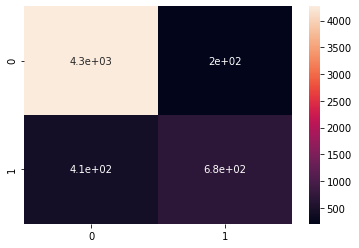

In [22]:
# confusion matrix

cnn = confusion_matrix(y_census_teste_under, previsoes)
print(cnn)
sns.heatmap(cnn, annot=True);

In [23]:
# classification report 

print(classification_report(y_census_teste_under, previsoes))

              precision    recall  f1-score   support

       <=50K       0.91      0.96      0.93      4465
        >50K       0.77      0.62      0.69      1088

    accuracy                           0.89      5553
   macro avg       0.84      0.79      0.81      5553
weighted avg       0.89      0.89      0.89      5553



In [24]:
# implemetação do SMOTE 

In [25]:
# visualização da base de dados

X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [26]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [27]:
# over sampling

smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720], dtype=int64))


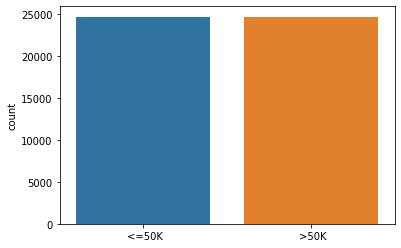

In [28]:
# quantidade registros por classe
# quantidade, visual 

print(np.unique(y_over, return_counts=True))
sns.countplot(y_over);

In [29]:
#  separação treino e teste

X_census_treinamento_over, X_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)
X_census_treinamento_over.shape, X_census_teste_over.shape

((39552, 14), (9888, 14))

In [30]:
# uso de algoritmo de classificação
# randomForest

# definindo paramtros
random_forest_classifier = RandomForestClassifier(n_estimators=100,
                                                  criterion='entropy',
                                                  min_samples_split=5,
                                                  min_samples_leaf=1)

# treino
random_forest_classifier.fit(X_census_treinamento_over, y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [31]:
# previsão do modelo

previsoes = random_forest_classifier.predict(X_census_teste_over)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [32]:
# avaliação

accuracy_score(y_census_teste_over, previsoes)

0.904126213592233

[[4573  371]
 [ 577 4367]]


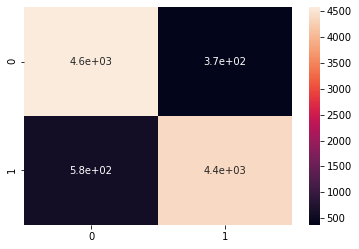

In [33]:
# confusion matrix
cnn = confusion_matrix(y_census_teste_over, previsoes)
print(cnn)
sns.heatmap(cnn, annot=True);

In [34]:
# classification report 

print(classification_report(y_census_teste_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.91      4944
        >50K       0.92      0.88      0.90      4944

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

